In [1]:
import pandas as pd
df=pd.read_csv('stockdata.csv')

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
titles=df['title'].tolist()
cleaned_titles=[]
# Define the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
for text in titles:
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
      
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    cleaned_titles.append(preprocessed_text)

# Apply preprocessing to each title in the list

# Add the cleaned titles back to the DataFrame
df['cleaned_title'] = cleaned_titles

# Display the DataFrame
df.head()

,ticker,date,time,title,cleaned_title
0,AMZN,Jan-02-25,12:42AM,Jeff Bezos and Elon Musk might be best friends...,jeff bezos elon musk might best friend amazon ...
1,AMZN,Jan-31-25,11:08PM,"Jim Cramer Says Amazon.com, Inc. (AMZN) 'Is Th...",jim cramer say amazoncom inc amzn one really r...
2,AMZN,Jan-31-25,07:00PM,"Tariffs, Amazon earnings, Jobs data: What to W...",tariff amazon earnings job data watch next week
3,AMZN,Jan-31-25,06:27PM,"Amazon.com, Inc. (AMZN): Expanding Generative ...",amazoncom inc amzn expanding generative ai dat...
4,AMZN,Jan-31-25,05:50PM,Amazon is jumping on the DeepSeek wave to boas...,amazon jumping deepseek wave boast ai game rea...


In [4]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Apply TF-IDF to the 'cleaned_title' column
# tfidf_matrix = vectorizer.fit_transform(df['cleaned_title'])

# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [5]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Function to assign sentiment labels
def assign_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0:
        return 'positive'
    else:
        return 'negative'
    

# Apply the function to the 'cleaned_title' column
df['sentiment_label'] = df['cleaned_title'].apply(assign_sentiment)

# Display the DataFrame with sentiment labels
print(df[['cleaned_title', 'sentiment_label']])


                                         cleaned_title sentiment_label
0    jeff bezos elon musk might best friend amazon ...        positive
1    jim cramer say amazoncom inc amzn one really r...        positive
2      tariff amazon earnings job data watch next week        positive
3    amazoncom inc amzn expanding generative ai dat...        positive
4    amazon jumping deepseek wave boast ai game rea...        positive
..                                                 ...             ...
995  billionaire bill ackman betting big nike sport...        positive
996  tariff loom one retailer aim keep price low ni...        negative
997                   dow get hit sledgehammer worried        negative
998                      nike price target lowered ubs        negative
999           nike price target lowered morgan stanley        negative

[1000 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_title'])  # Features (TF-IDF vectors)
y = df['sentiment_label']  # Target labels (positive, negative)

# Step 2: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.895


In [7]:
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Recall (Macro): {recall_macro:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")

Precision (Macro): 0.94
Recall (Macro): 0.69
F1-Score (Macro): 0.75


In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        34
    positive       0.89      1.00      0.94       166

    accuracy                           0.90       200
   macro avg       0.94      0.69      0.75       200
weighted avg       0.91      0.90      0.87       200



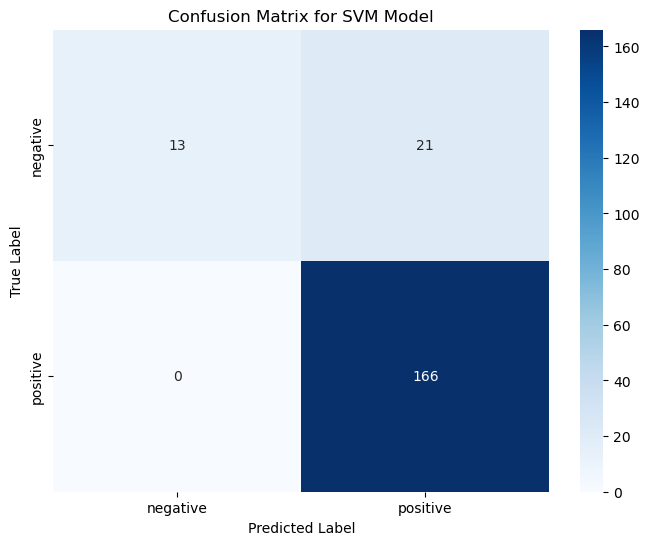

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [10]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred1 = dt_model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
precision_macro = precision_score(y_test, y_pred1, average='macro')
recall_macro = recall_score(y_test, y_pred1, average='macro')
f1_macro = f1_score(y_test, y_pred1, average='macro')

print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Recall (Macro): {recall_macro:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")

Accuracy: 0.895
Precision (Macro): 0.86
Recall (Macro): 0.74
F1-Score (Macro): 0.78


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.50      0.62        34
    positive       0.91      0.98      0.94       166

    accuracy                           0.90       200
   macro avg       0.86      0.74      0.78       200
weighted avg       0.89      0.90      0.88       200



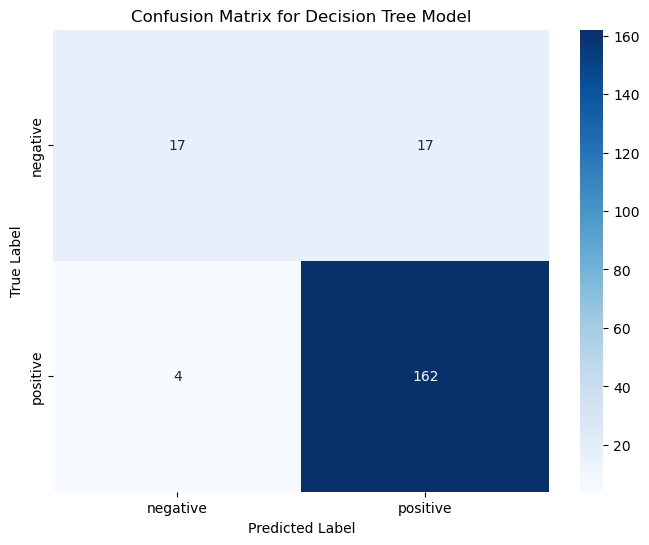

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

df1=df
label_mapping = {'positive': 1, 'negative': 0}
df1['label'] = df1['sentiment_label'].map(label_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df1['title'], df1['label'], test_size=0.2, random_state=42)
# X_train1, X_val, y_train1, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)

X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input size
max_length = 50  # max length for sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
# X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64),
    Dense(2, activation='sigmoid')  # Output layer for 2 classes: positive, negative
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn=rnn_model.fit(X_train_padded, y_train, epochs=10, batch_size=16, validation_data=(X_test_padded, y_test))

Epoch 1/10
50/50 [==============================] - 1s 9ms/step - loss: 0.4309 - accuracy: 0.8475 - val_loss: 0.4663 - val_accuracy: 0.8300
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.4122 - accuracy: 0.8562 - val_loss: 0.4588 - val_accuracy: 0.8300
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4147 - accuracy: 0.8537 - val_loss: 0.4215 - val_accuracy: 0.8550
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.3876 - accuracy: 0.8600 - val_loss: 0.3799 - val_accuracy: 0.8600
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.2784 - accuracy: 0.8888 - val_loss: 0.4688 - val_accuracy: 0.8400
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.2124 - accuracy: 0.9237 - val_loss: 0.4083 - val_accuracy: 0.8450
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.1110 - accuracy: 0.9688 - val_loss: 0.4546 - val_accuracy: 0.8450
Epoch 8/10
50/50 [==

In [20]:
# Evaluate RNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test)
print("RNN Test Accuracy:", rnn_accuracy)

# Get predicted probabilities and convert them to class labels
y_pred_probs = rnn_model.predict(X_test_padded)  
y_pred = np.argmax(y_pred_probs, axis=1)  

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Compute confusion matrix
# cm = confusion_matrix(y_test1, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for RNN')
# plt.show()



7/7 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.8150
RNN Test Accuracy: 0.8149999976158142
7/7 [==============================] - 0s 2ms/step
Precision: 0.88
Recall: 0.90
F1-Score: 0.89


In [30]:
from tensorflow.keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(2, activation='sigmoid')  # Output layer for 2 classes
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm=lstm_model.fit(X_train_padded, y_train, epochs=10, batch_size=16, validation_data=(X_test_padded, y_test))


Epoch 1/10
50/50 [==============================] - 2s 18ms/step - loss: 0.4493 - accuracy: 0.8562 - val_loss: 0.4595 - val_accuracy: 0.8300
Epoch 2/10
50/50 [==============================] - 1s 13ms/step - loss: 0.4130 - accuracy: 0.8562 - val_loss: 0.4636 - val_accuracy: 0.8300
Epoch 3/10
50/50 [==============================] - 1s 13ms/step - loss: 0.4194 - accuracy: 0.8562 - val_loss: 0.4595 - val_accuracy: 0.8300
Epoch 4/10
50/50 [==============================] - 1s 13ms/step - loss: 0.4159 - accuracy: 0.8562 - val_loss: 0.4555 - val_accuracy: 0.8300
Epoch 5/10
50/50 [==============================] - 1s 13ms/step - loss: 0.4149 - accuracy: 0.8562 - val_loss: 0.4549 - val_accuracy: 0.8300
Epoch 6/10
50/50 [==============================] - 1s 13ms/step - loss: 0.3386 - accuracy: 0.8800 - val_loss: 0.3850 - val_accuracy: 0.8300
Epoch 7/10
50/50 [==============================] - 1s 13ms/step - loss: 0.2203 - accuracy: 0.9325 - val_loss: 0.3804 - val_accuracy: 0.8800
Epoch 8/10
50

In [31]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print("LSTM Test Accuracy:", lstm_accuracy)
y_pred_probs = lstm_model.predict(X_test_padded)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels (0 or 1)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for LSTM')
# plt.show()


7/7 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.8750
LSTM Test Accuracy: 0.875
7/7 [==============================] - 0s 4ms/step
Precision: 0.92
Recall: 0.93
F1-Score: 0.93


In [10]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#CNN
df2 = df

# Tokenize the titles for Word2Vec training
tokenized_titles = [title.split() for title in df2['title']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(tokenized_titles, total_examples=len(tokenized_titles), epochs=10)
import numpy as np

# Initialize the embedding matrix with zeros
vocab_size = 5000  # Limit vocabulary size for tokenizer
embedding_dim = 100  # Embedding dimension size (same as Word2Vec vector size)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fit tokenizer on the titles for neural network input
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['title'])

# Populate embedding matrix with Word2Vec vectors
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:  # Ensure the index is within the limit
        try:
            embedding_vector = word2vec_model.wv[word]
            embedding_matrix[idx] = embedding_vector
        except KeyError:
            pass  
Xcnn = tokenizer.texts_to_sequences(df2['title'])
Xcnn_padded = pad_sequences(Xcnn, maxlen=50, padding='post')

# Encode labels
label_mapping = {'positive': 1, 'negative': 0}
ycnn = df2['sentiment_label'].map(label_mapping).values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split

# Split into training and test sets
Xcnn_train, Xcnn_test, ycnn_train, ycnn_test = train_test_split(Xcnn_padded, ycnn, test_size=0.2, random_state=42)

# Define the model
def build_cnn_lstm_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=50, trainable=False),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(2, activation='sigmoid')  # Output layer for 2 classes: positive, negative
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
cnn_model = build_cnn_lstm_model()
cnn=cnn_model.fit(Xcnn_train, ycnn_train, epochs=10, batch_size=16, validation_split=0.2)



Epoch 1/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.8406 - val_loss: 0.3978 - val_accuracy: 0.8687
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8531 - val_loss: 0.3824 - val_accuracy: 0.8687
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8531 - val_loss: 0.3874 - val_accuracy: 0.8687
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.8531 - val_loss: 0.3976 - val_accuracy: 0.8687
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.8531 - val_loss: 0.3848 - val_accuracy: 0.8687
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.8531 - val_loss: 0.4033 - val_accuracy: 0.8687
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8531 - val_loss: 0.3688 - val_accuracy: 0.8687
Epoch 8/10
40/40 [==

In [11]:
# Evaluate on test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(Xcnn_test, ycnn_test)
print("CNN with Word2Vec Test Accuracy:", cnn_test_accuracy)
y_pred_probs = cnn_model.predict(Xcnn_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels (0 or 1)

precision = precision_score(ycnn_test, y_pred, average='binary')
recall = recall_score(ycnn_test, y_pred, average='binary')
f1 = f1_score(ycnn_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
cm = confusion_matrix(ycnn_test, y_pred)

# Plot confusion matrix
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for CNN')
# plt.show()


7/7 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8300
CNN with Word2Vec Test Accuracy: 0.8299999833106995
7/7 [==============================] - 0s 2ms/step
Precision: 0.83
Recall: 1.00
F1-Score: 0.91


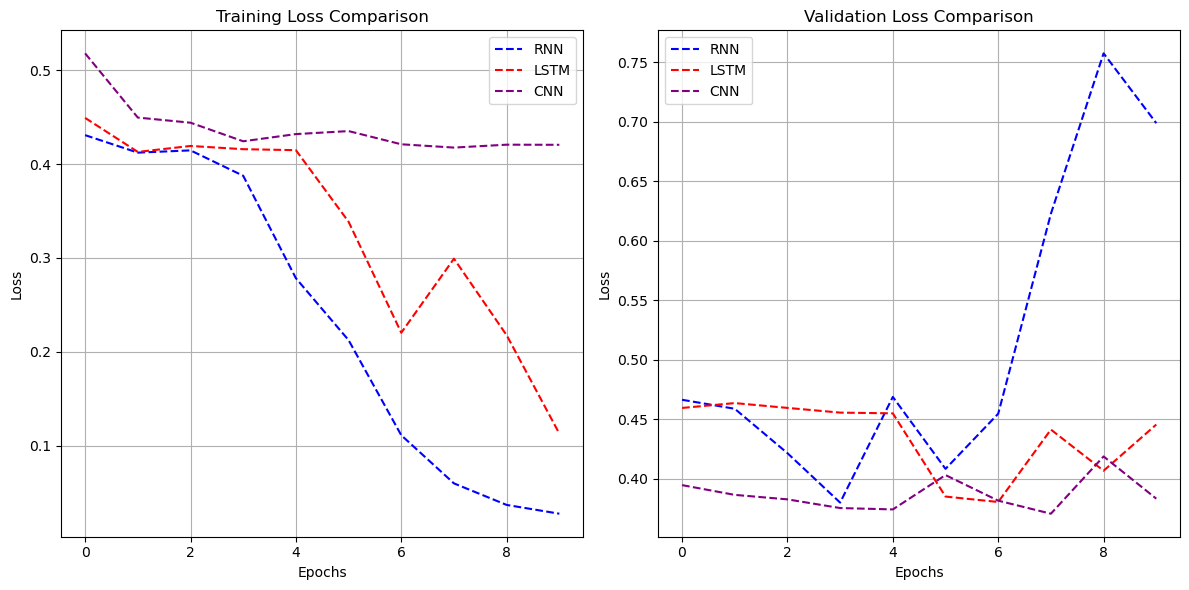

In [32]:
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(rnn.history['loss'], label="RNN", linestyle='--', color='blue')
plt.plot(lstm.history['loss'], label="LSTM", linestyle='--', color='red')
plt.plot(cnn.history['loss'], label="CNN", linestyle='--', color='purple')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(rnn.history['val_loss'], label="RNN", linestyle='--', color='blue')
plt.plot(lstm.history['val_loss'], label="LSTM", linestyle='--', color='red')
plt.plot(cnn.history['val_loss'], label="CNN", linestyle='--', color='purple')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


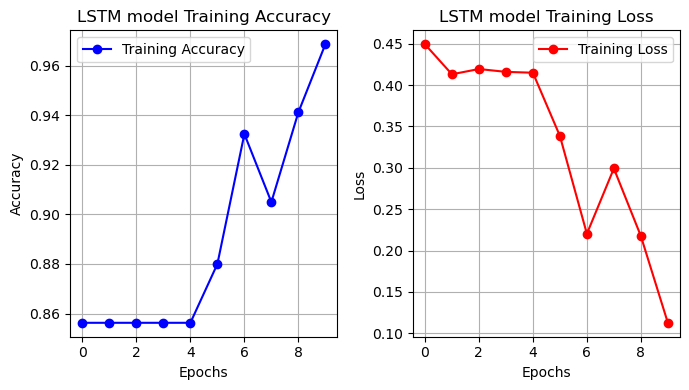

In [43]:
import matplotlib.pyplot as plt

# Create figure for Training Accuracy & Loss
plt.figure(figsize=(7,4))

# Training Accuracy
plt.subplot(1,2,1)
plt.plot(lstm.history['accuracy'], label="Training Accuracy", color='blue', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM model Training Accuracy")
plt.legend()
plt.grid(True)

# Training Loss
plt.subplot(1,2,2)
plt.plot(lstm.history['loss'], label="Training Loss", color='red', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM model Training Loss")
plt.legend()
plt.grid(True)

# Display both subplots
plt.tight_layout()
plt.show()


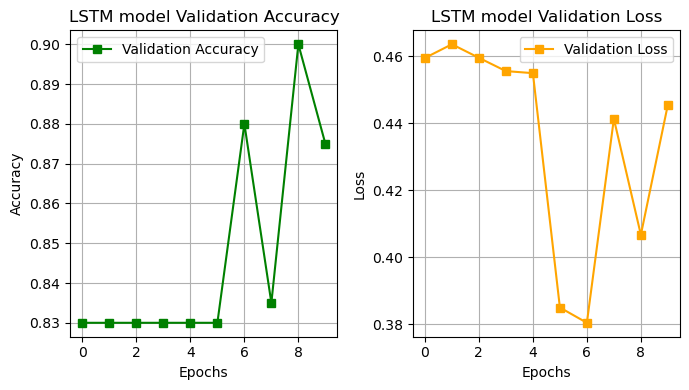

In [42]:
plt.figure(figsize=(7,4))

# Validation Accuracy
plt.subplot(1,2,1)
plt.plot(lstm.history['val_accuracy'], label="Validation Accuracy", color='green', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM model Validation Accuracy")
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(1,2,2)
plt.plot(lstm.history['val_loss'], label="Validation Loss", color='orange', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM model Validation Loss")
plt.legend()
plt.grid(True)

# Display both subplots
plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for each model (extract positive class probability)
y_pred_prob_rnn = rnn_model.predict(X_test_padded)[:, 1]  
y_pred_prob_lstm = lstm_model.predict(X_test_padded)[:, 1]  
y_pred_prob_cnn = cnn_model.predict(X_test_padded)[:, 1]  
# Compute Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_rnn = mean_squared_error(y_test, y_pred_prob_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_prob_rnn)

mse_lstm = mean_squared_error(y_test, y_pred_prob_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_prob_lstm)

mse_cnn = mean_squared_error(y_test, y_pred_prob_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_prob_cnn)

# Print results
print(f"🔹 RNN - MSE: {mse_rnn:.4f}, MAE: {mae_rnn:.4f}")
print(f"🔹 LSTM - MSE: {mse_lstm:.4f}, MAE: {mae_lstm:.4f}")
print(f"🔹 CNN - MSE: {mse_cnn:.4f}, MAE: {mae_cnn:.4f}")



7/7 [==============================] - 0s 2ms/step
🔹 RNN - MSE: 0.1423, MAE: 0.2122
🔹 LSTM - MSE: 0.0989, MAE: 0.2069
🔹 CNN - MSE: 0.1746, MAE: 0.3988


Decision Tree gave highest accuracy, now creating data visualizations based on the outcome of Decision Tree

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df_train = df.iloc[:800].copy()
df_test = df.iloc[800:].copy()
df_test['predicted_sentiment'] = y_pred1
df_train['predicted_sentiment'] = df_train['sentiment_label']
df_all = pd.concat([df_train, df_test], ignore_index=True)

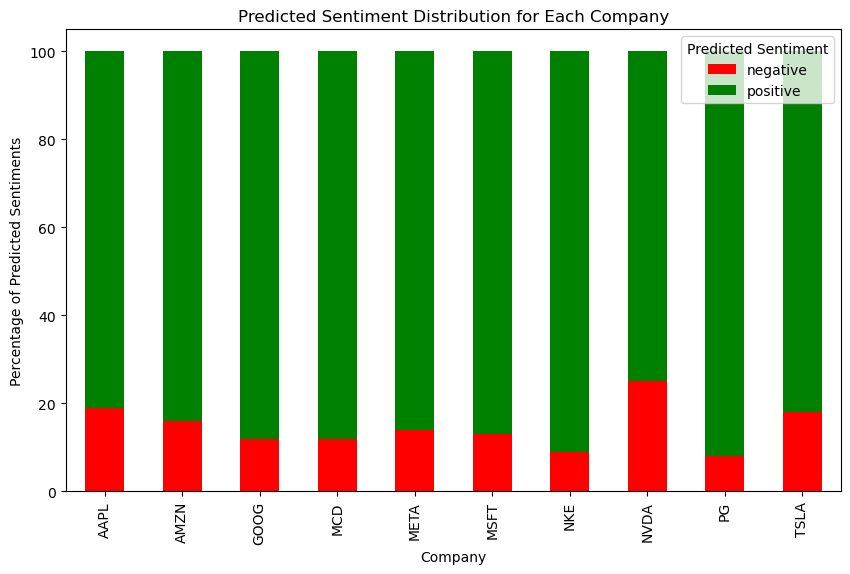

In [42]:
sentiment_counts = df_all.groupby(['ticker', 'predicted_sentiment']).size().unstack(fill_value=0)

# Stacked bar plot for sentiment distribution
sentiment_counts.plot(kind='bar', stacked=True, color=['red','green'], figsize=(10, 6))
plt.title('Predicted Sentiment Distribution for Each Company')
plt.xlabel('Company')
plt.ylabel('Percentage of Predicted Sentiments')
plt.legend(title='Predicted Sentiment')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["SentiWordNet", "RNN", "LSTM","CNN"]

# Performance metrics (Example values)
accuracy = [0.824, 0.855, 0.879, 0.829]
precision = [0.86, 0.89, 0.95, 0.92]
recall = [0.94, 0.95, 0.99, 1.00]
f1_score = [0.90, 0.92, 0.93, 0.91]


In [39]:
markers = ["o", "s", "D", "^"]  # Circle, Square, Diamond, Triangle

# Assign colors for better visibility
colors = ['y','b', 'r', 'purple']

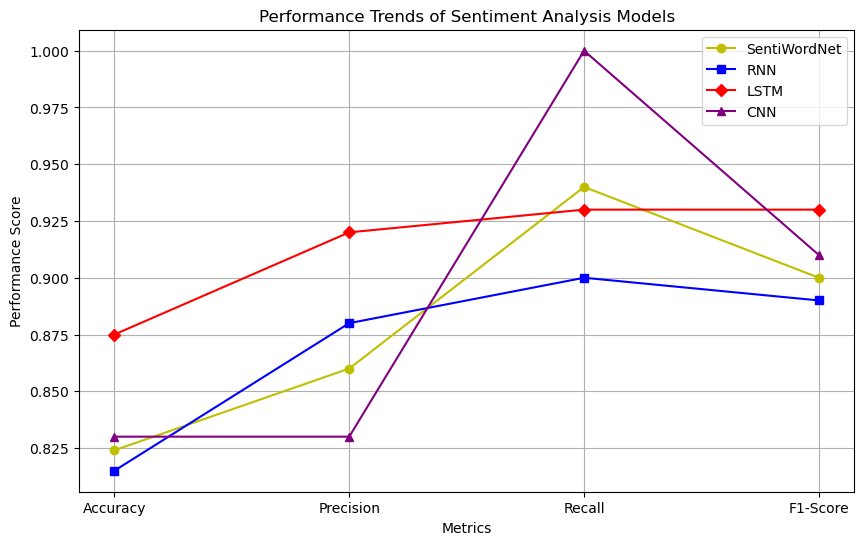

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["SentiWordNet", "RNN", "LSTM","CNN"]

# Performance metrics (Example values)
accuracy = [0.824, 0.815, 0.875, 0.83]
precision = [0.86, 0.88, 0.92, 0.83]
recall = [0.94, 0.90, 0.93, 1.00,]
f1_score = [0.90, 0.89, 0.93, 0.91]
plt.figure(figsize=(10, 6))

# Plot each model's performance across metrics
for i in range(len(models)):
    plt.plot(["Accuracy", "Precision", "Recall", "F1-Score"], 
             [accuracy[i], precision[i], recall[i], f1_score[i]], 
             label=models[i], 
             marker=markers[i], 
             color=colors[i], 
             linestyle='-')

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Performance Score")
plt.title("Performance Trends of Sentiment Analysis Models")
plt.legend()
plt.grid(True)
plt.show()

